<a href="https://colab.research.google.com/github/lmuppala724/denoising_images/blob/main/AddingNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def poisson_noise(img, scale):
  noisy_img = np.random.poisson(img*scale)
  return noisy_img

In [ ]:
# Creating gray training dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/train"
directory_en = os.fsencode(folder_str)

grayimage_folder = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/gray_train"

index=0
for file in sorted(os.listdir(directory_en)):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".jpg"):
    index += 1 
    image = Image.open(subdir).convert('L') # Converts the image to grayscale
    path = f"{grayimage_folder}/train_gray_{index}.tiff" # Creates the path to store the images
    tf.imsave(path, np.asarray(image))
    



In [ ]:
# Creating poisson noise added gray training dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/gray_train"
directory_en = os.fsencode(folder_str)

gray_noise_image_folder = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/gray_poisson_noise_train"

index=0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".tiff"):
    index += 1 
    image = Image.open(subdir) # Opens each image
    noise_image = poisson_noise(np.asarray(image), 1/6) * 6 # Adds poisson noise by scaling the image down by 1/6 and then scaling up by 6
    path = f"{gray_noise_image_folder}/train_gray_noise_{index}.tiff" # Creates the path to store the images
    tf.imsave(path, noise_image.astype(np.int32))


In [ ]:
# Creating Poisson Noise Added Colour Image Dataset

import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir

folder_str = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/train"
directory_en = os.fsencode(folder_str)

gray_noise_image_folder = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/colour_poisson_noise_train"

index=0
for file in os.listdir(directory_en):
  filename = os.fsdecode(file)
  subdir = os.path.join(folder_str, filename)

  if filename.endswith(".jpg"):
    index += 1 
    image = Image.open(subdir) # Opens each image
    noise_image = poisson_noise(np.asarray(image), 1/6) * 6 # Adds poisson noise by scaling the image down by 1/6 and then scaling up by 6
    path = f"{gray_noise_image_folder}/train_gray_noise_{index}.tiff" # Creates the path to store the images
    tf.imsave(path, noise_image.astype(np.int32))



In [ ]:
import cv2

def noise(img, std):
  noise = np.random.randn(*img.shape)
  return img + noise*std, noise
     



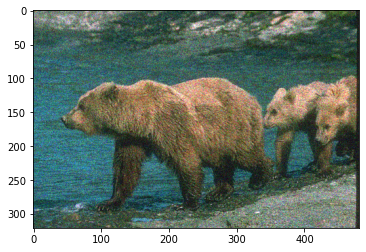

Gaussian noise


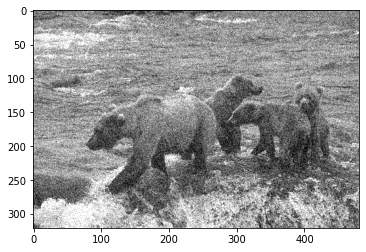

Poisson noise


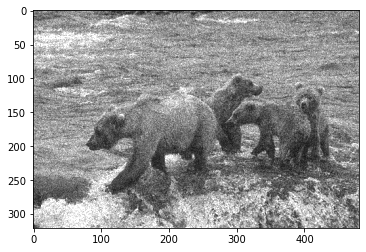

Original image


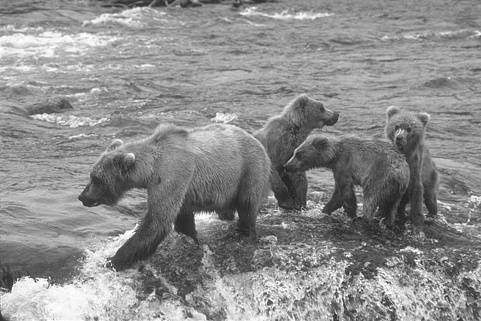

In [ ]:
import pandas as pd
import numpy as np
import os
import tifffile as tf
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from os import listdir


path = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/gray_train/train_gray_1.tiff"
image = Image.open(path)

rgb_img_path = "/content/drive/MyDrive/Denoising with Single Noisy Images/Dataset/train/100075.jpg"
rgb_img = Image.open(rgb_img_path)

colour_poisson_img = poisson_noise(np.asarray(rgb_img), 1/5) * 5
plt.imshow(colour_poisson_img.astype(np.int32))
plt.show()

numpydata = asarray(image)

poisson_img = poisson_noise(numpydata, 1/6) * 6

gaussian_noise_imgs, n = noise(numpydata, 30)

print("Gaussian noise")
plt.imshow(gaussian_noise_imgs.astype(np.int32), cmap='gray', vmin=0, vmax=255)
plt.show()

print("Poisson noise")
plt.imshow(poisson_img.astype(np.int32), cmap='gray', vmin=0, vmax=255)
plt.show()

print("Original image")
image





